<a href="https://colab.research.google.com/github/Ethan-Jeong/test_deeplearning/blob/master/NLP%20/%20wordcloud_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
 df = pd.read_csv('smtph_total.csv')
 df.head(5)

,Title,Link,Description,Blogger Name,Blogger Link,Post Date,Post Contents
0,"갤럭시 Z 플립과 한 달, 접는 스마트폰의 가치만 남다",https://chitsol.com/entry/galaxy_z_flip_review/,반으로 접을 수 있는 갤럭시 Z 플립이 접지 않는 스마트폰과 얼마나 다른 경험인가를...,https://chitsol.com/,https://chitsol.com/,20210712,NaN
1,스마트폰 삼각대 추천 내돈내산 리뷰,https://blog.naver.com/kimhw1020?Redirect=Log&...,그래서 스마트폰 삼각대 추천 하는 제품을 구매하게 된 것 같아요. 2018년 4월 ...,진돗개 솜이랑 언니랑,https://blog.naver.com/kimhw1020,20210720,\n\n\n\n\n\n\n솜이언니 일상\n\n\n\n\n스마트폰 삼각대 추천 내돈내...
2,귀여운 스마트폰 거치대 + 아이폰 케이스(다이소 비교),https://blog.naver.com/logix200?Redirect=Log&l...,스마트폰 거치대 홀더 &quot;아이폰 케이스도 졸.귀.탱&quot; 안녕하세요. ...,옥희돌이 칩시크족,https://blog.naver.com/logix200,20210802,\n\n\n\n\n\n\n일반 수령기\n\n\n\n\n귀여운 스마트폰 거치대 + 아...
3,"베스틴 원패스 스마트폰 어플, 아이파크 공동 현관문 핸드폰 연동",https://blog.naver.com/july7th73?Redirect=Log&...,"요즘 신축 아파트들은 대부분 IoT 스마트 기기들을 이용한 출입시스템을 도입, 각종...",수연아빠의 야구장 출동 (개포맘모스),https://blog.naver.com/july7th73,20210816,\n\n\n\n\n\n\n파워리뷰즐기기\n\n\n\n\n베스틴 원패스 스마트폰 어플...
4,대전스마트폰복구 삭제나 고장도 걱정없이,https://blog.naver.com/jcy0207?Redirect=Log&lo...,바쁜 현대인들의 곁에서 어디서든 일상을 함께하는 스마트폰은 한순간도 뗄레야 뗄 수 ...,모아의 교육정보 모아모아,https://blog.naver.com/jcy0207,20210609,\n\n안녕하세요 모아입니다.바쁜 현대인들의 곁에서어디서든 일상을 함께하는 스마트폰...


In [3]:
df.columns

Index(['Title', 'Link', 'Description', 'Blogger Name', 'Blogger Link',
       'Post Date', 'Post Contents'],
      dtype='object')

In [4]:
 posts = df['Title'] + df['Description']
 type(posts)

pandas.core.series.Series

In [5]:
posts.max() , posts.min()

('휴대폰 스마트폰클리너 필터온 일회용 멀티클리너얼룩진 스마트폰을 손상 없이 깨끗하게 해주는 일회용 멀티클리너를 사용해봤습니다. 낱개 포장되어 있어서 휴대성이 좋아요. 물티슈를 쓸 때처럼 쓱쓱 닦아주면 되니 사용법도 간단합니다. 스마트폰뿐만... ',
 '&lt;집에서 찍는 스마트폰 제품사진&gt; 출간!역장의 12번째 신간 &lt;집에서 찍는 스마트폰 제품사진&gt;이 드디어 출간됐습니다. 지난 2017년 겨울... 요즘은 스마트폰으로 쇼핑을 하는 사람들이 많기 때문에 결국 소비자들에게 보여지는 건 손바닥보다 작은... ')

In [6]:
!python3 -m pip install konlpy

In [7]:
from konlpy.tag import Okt
tagger = Okt()

In [8]:
stop_words = ['강,', '글,', '애', '미', '번', '은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹', '때', '만', '원', '이때', '개']


In [9]:
posts_noun = []
for post in posts:
  # print(tagger.nouns(post))
  for noun in tagger.nouns(post):
    posts_noun.append(noun)

len(posts_noun)


26085

In [10]:
from collections import Counter

In [11]:
noun_counter = Counter(posts_noun)

In [12]:
noun_counter

Counter({'갤럭시': 317,
         '플립': 10,
         '달': 6,
         '스마트폰': 3159,
         '가치': 5,
         '남': 2,
         '다반': 1,
         '접': 2,
         '수': 177,
         '접지': 1,
         '얼마나': 4,
         '다른': 31,
         '경험': 4,
         '를': 100,
         '여기': 10,
         '조금': 18,
         '관점': 1,
         '기존': 15,
         '기능': 86,
         '유지': 5,
         '것': 127,
         '그냥': 4,
         '의미': 4,
         '삼각대': 73,
         '추천': 38,
         '돈': 12,
         '산': 7,
         '리뷰': 25,
         '제품': 113,
         '구매': 40,
         '날': 7,
         '결제': 7,
         '이': 66,
         '전': 24,
         '브랜드': 20,
         '사용': 346,
         '폰': 132,
         '술': 1,
         '거치': 93,
         '아이폰': 55,
         '케이스': 22,
         '다이소': 6,
         '비교': 20,
         '홀더': 6,
         '졸': 1,
         '귀': 1,
         '얼마': 11,
         '제': 28,
         '정말': 21,
         '캐릭터': 1,
         '알리': 4,
         '개': 26,
         '판매': 19,
         '자가'

In [13]:
top_30_nouns = noun_counter.most_common(30)

In [14]:
type(top_30_nouns) , top_30_nouns

(list,
 [('스마트폰', 3159),
  ('강의', 363),
  ('사용', 346),
  ('갤럭시', 317),
  ('사진', 253),
  ('카메라', 246),
  ('동영상', 231),
  ('삼성', 228),
  ('제작', 191),
  ('유튜브', 184),
  ('수', 177),
  ('반응', 171),
  ('위', 168),
  ('출시', 163),
  ('스마트', 149),
  ('방법', 146),
  ('활용', 134),
  ('앱', 133),
  ('전자', 133),
  ('안드로이드', 133),
  ('폰', 132),
  ('스펙', 128),
  ('것', 127),
  ('글', 116),
  ('중', 115),
  ('제품', 113),
  ('촬영', 112),
  ('강', 107),
  ('샤오미', 103),
  ('보급', 101)])

In [15]:
top_nouns_dict = dict(top_30_nouns)
type(top_nouns_dict)

dict

In [16]:
from wordcloud import WordCloud

In [17]:
nouns_wordcloud = WordCloud()


In [18]:
nouns_wordcloud.generate_from_frequencies(top_nouns_dict)

In [19]:
import matplotlib.pyplot as plt

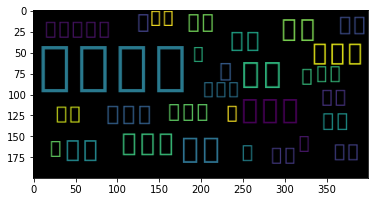

In [20]:
plt.imshow(nouns_wordcloud)
# ax = figure.add_subplot(1,1,1)
# ax.imshow(nouns_wordcloud)

한글 폰트 적용

https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/korean_font_on_matplotlib.ipynb

## Word2Vec

In [21]:
from gensim.models import Word2Vec

In [22]:
word2vec = Word2Vec(posts_noun,min_count=1)

In [24]:
word2vec.wv.most_similar('스마트폰')

KeyError: ignored